## Use Case: Analyze and predict US Covid-19 Deaths based on the previous data on coronavirus deaths. Factors that reduce the spread of the virus thereby minimizing the death casualities like mask use, vaccination and social distancing were not considered in this analysis. 

The first generic step involve in a data science project is the **ETL**. <br/>
ETL, a data integration process that is Extract, Transform and Load, these are three distinct processes but are interrelated.<br/>

## ETL
### **Extract** <br/>
   1. Cloned the data from data source link or repository.<br/>
   2. Access the data what files type it contain.<br/>
   3. Read the data into pandas dataframe.<br/>
    
### **Transform**<br/>
   1. Use statistical measures like min, max, mean, standard deviation to see how values are distributed in the data.<br/>
   2. Identify columns with potential data quality for modeling.<br/>
   3. Handle columns with wrong data values in each row.<br/>
   4. Apply a method to calculate the right values of the rows in the columns identified for modeling.<br/>
   5. Split and match data types of columns.<br/>
   6. Copy values into new columns for visualization and feature engineering.<br/>
   7. Scalling, converting and modify features

### **Load**<br/>
   1. Save the transform data to a database or data warehouse but in this project, the data is loaded into a pdf file and<br/>
   2. Pushed to github repository.<br/><br/>



The data was extracted from https://github.com/nytimes/covid-19-data, it is updated in real-time. <br/>
The New York Times release a series of data files with cumulative counts of coronavirus cases and deaths in the United States, <br/>
at the state and county level, over time. The scope of this project is concentrated on the daily number of corona virus deaths nationwide, <br/>
including states, U.S. territories and the District of Columbia, the required csv file for the analyzes is us.csv.<br/>

## ETL ## - Extrat Transform Load

In [ ]:
## Import the packages nedded

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
#!pip install pyspark==2.4.5

In [3]:
#try:
 #   from pyspark import SparkContext, SparkConf
 #   from pyspark.sql import SparkSession
#except ImportError as e:
 #   printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [4]:
#sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

#spark = SparkSession \
 #   .builder \
 #   .getOrCreate()

Clone the data from the source repository.

In [2]:
!git clone https://github.com/nytimes/covid-19-data.git

Cloning into 'covid-19-data'...
remote: Enumerating objects: 10037, done.
remote: Total 10037 (delta 0), reused 0 (delta 0), pack-reused 10037
Receiving objects: 100% (10037/10037), 505.06 MiB | 1.87 MiB/s, done.
Resolving deltas: 100% (6235/6235), done.


List the directory contents of our data.

In [3]:
!ls covid-19-data

colleges       mask-use			       us-counties.csv
excess-deaths  NEW-YORK-DEATHS-METHODOLOGY.md  us-counties-recent.csv
LICENSE        PROBABLE-CASES-NOTE.md	       us.csv
live	       README.md		       us-states.csv


Read the csv file into pandas dataframe.

In [4]:
df = pd.read_csv('covid-19-data/us.csv')
df['daily_cases'] = df.cases - df.cases.shift(1).fillna(0).astype(int) #compute the true value of daily cases by substracting the previous value from the current.
df['daily_deaths'] = df.deaths - df.deaths.shift(1).fillna(0).astype(int) #compute the true value of daily deaths by substracting the previous value from the current.
df['year'] = pd.DatetimeIndex(df['date']).year  
y_col='daily_deaths' #define the variable to predict

df.tail()

,date,cases,deaths,daily_cases,daily_deaths,year
406,2021-03-02,28737407,515710,57789,1306,2021
407,2021-03-03,28804121,518079,66714,2369,2021
408,2021-03-04,28871536,520028,67415,1949,2021
409,2021-03-05,28937218,522511,65682,2483,2021
410,2021-03-06,28993824,523970,56606,1459,2021


In [172]:
#df['daily_cases'] = df.cases - df.cases.shift(1).fillna(0).astype(int)
#df['daily_deaths'] = df.deaths - df.deaths.shift(1).fillna(0).astype(int)
#df.drop('Year', axis=1,inplace=True)
#df.tail(50)
#print(df.tail(100))

In [173]:
#df['year'] = pd.DatetimeIndex(df['date']).year  

#df.tail(50)

Compute the total daily cases

In [5]:
df['daily_cases'].sum()

28993824

Compute the total daily deaths

In [6]:
df['daily_deaths'].sum()

523970

Compute the highest daily cases

In [7]:
df['daily_cases'].max()

300619

Compute the highest daily deaths

In [8]:
df['daily_deaths'].max()

5463

## Data Visualization ##

Let's visualize the daily case and death count of covid-19 in a graphical representaion using seaborn and matplotlib. <br/> This will help users to see and understand trends and pattern in the data. You will be able to determine or derive a meaningful insights from the data during the epandemic years 2020 & 2021.

Visualizing **daily case** count.

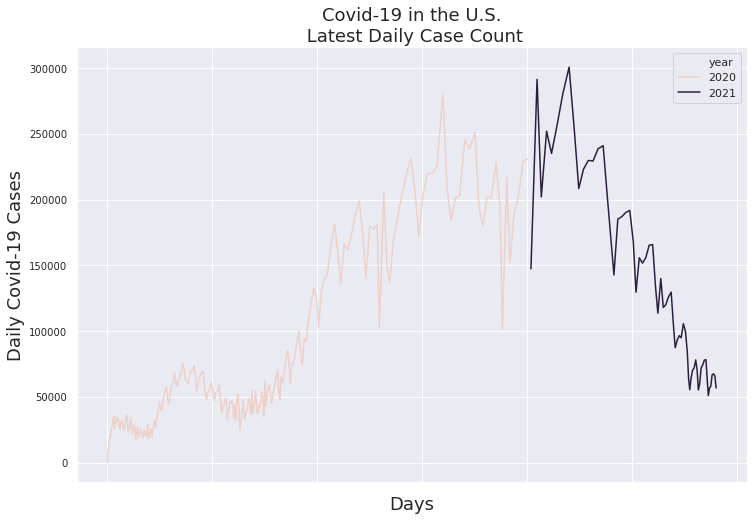

<Figure size 2880x1440 with 0 Axes>

In [12]:
daily_cases = sns.lineplot(x="cases", y="daily_cases", data=df, hue='year')

sns.set(rc={'figure.figsize':(12,8)})

daily_cases.set(xticklabels=[])

#daily_cases.set(xlabel=None)

plt.ylabel("Daily Covid-19 Cases", fontsize = 18)
plt.xlabel("Days", fontsize = 18)
plt.title("Covid-19 in the U.S.\n Latest Daily Case Count", fontsize = 18)
plt.xticks(size = 10, rotation=45)
plt.yticks(size = 10)
plt.figure(figsize=(40,20))
plt.show()

Visualizing **daily death** count.

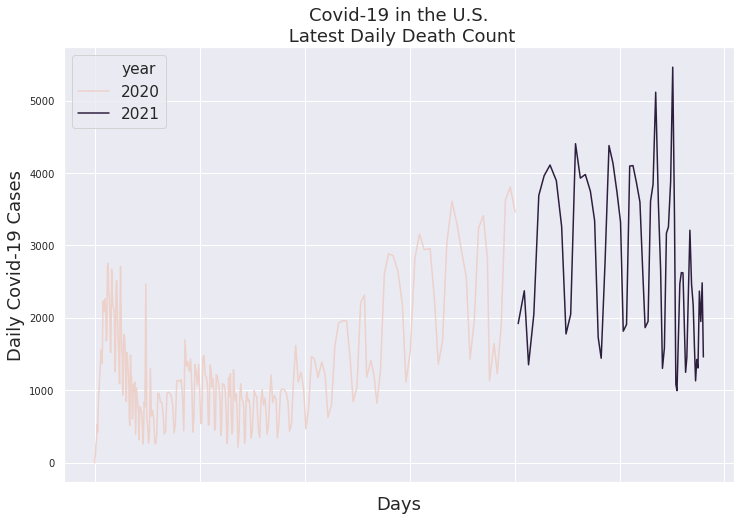

<Figure size 2880x1440 with 0 Axes>

In [89]:
daily_cases = sns.lineplot(x="cases", y="daily_deaths", data=df, hue='year')

sns.set(rc={'figure.figsize':(12,8)})

daily_cases.set(xticklabels=[])

#daily_cases.set(xlabel=None)

plt.ylabel("Daily Covid-19 Cases", fontsize = 18)
plt.xlabel("Days", fontsize = 18)
plt.title("Covid-19 in the U.S.\n Latest Daily Death Count", fontsize = 18)
plt.xticks(size = 10, rotation=45)
plt.yticks(size = 10)
plt.figure(figsize=(40,20))
plt.show()

Plot the data of the varialble we want to predict.

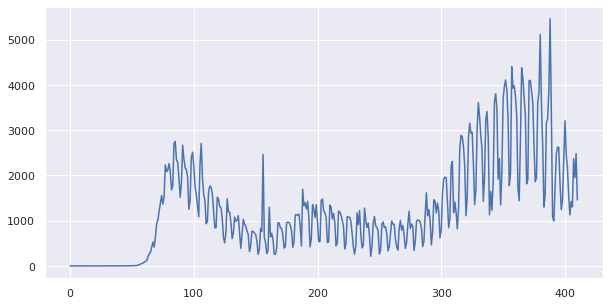

In [16]:
plt.figure(figsize=(10,5))
plt.plot(range(len(df)),df[y_col]);

Split the data into train and test set

In [17]:
test_size = int(len(df) * 0.2) # the test data will be 10% (0.1) of the entire data
train_data = df.iloc[:-test_size,:].copy() 
# the copy() will prevent us from getting: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame. Try using .loc[row_index,col_indexer] = value instead
test_data = df.iloc[-test_size:,:].copy()
print(train_data.shape, test_data.shape)


(329, 6) (82, 6)


visualize the train and test data.

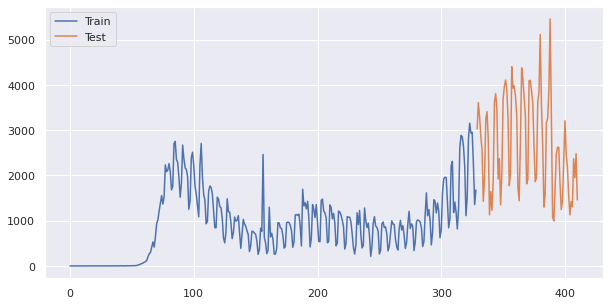

In [21]:
plt.figure(figsize=(10,5))
plt.plot(train_data.index,train_data[y_col],label='Train');
plt.plot(test_data.index,test_data[y_col],label='Test')
plt.legend();

We seperate train and test data.

In [22]:
X_train = train_data.drop(y_col,axis=1).copy()
y_train = train_data[[y_col]].copy() # the double brakets here are to keep the y in dataframe format, otherwise it will be pandas Series
print(X_train.shape, y_train.shape)

(329, 5) (329, 1)


Train data

In [23]:
X_train = X_train.iloc[:, 1:5]
X_train

,cases,deaths,daily_cases,year
0,1,0,1,2020
1,1,0,0,2020
2,1,0,0,2020
3,2,0,1,2020
4,3,0,1,2020
...,...,...,...,...
324,15697271,292771,225221,2020
325,15977838,295726,280567,2020
326,16185267,297981,207429,2020
327,16369491,299338,184224,2020


In [25]:
y_train

,daily_deaths
0,0
1,0
2,0
3,0
4,0
...,...
324,2941
325,2955
326,2255
327,1357


Scale the data using minmaxscaler for the range to be between zero(0) and one(1) and ready to use for deep learning model

We convert the data from pandas dataframe to numpy arrays which is required by keras. In line 1–8 we first scale X and y using the sklearn MinMaxScaler model, so that their range will be from 0 to 1. The next lines are some shape manipulation to the y in order to make it applicable for keras. We need the shape of y to be (n, ), where n is the number of rows. Line 12 “pushes” the y data one step forward by adding zero in the first position and line 13 keeps the shape of y by deleting the last time step (last row). Here is a simplified example of what happens in line 12–13:

In [26]:
from sklearn.preprocessing import MinMaxScaler

Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
print(X_train.shape)
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train)
scaled_y_train = Yscaler.transform(y_train)
print(scaled_y_train.shape)
scaled_y_train = scaled_y_train.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_train.shape)

scaled_y_train = np.insert(scaled_y_train, 0, 0)
scaled_y_train = np.delete(scaled_y_train, -1)

(329, 4)
(329, 1)
(329,)


The TimeseriesGenerator transforms X and y samples into a structure ready to train deep learning models.

In [27]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


n_input = 8 #how many samples/rows/timesteps to look in the past in order to forecast the next sample
features= X_train.shape[1] # how many predictors/features we have to predict y
b_size = 32 # Number of timeseries samples in each batch
generator_1 = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=n_input, batch_size=b_size)

print(generator_1[0][0].shape)

(32, 8, 4)


## Deep Learning Model - LSTM

Instantiate the model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, features)))
model.add(Dense(1))
model.add(Dropout(0.2))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               93000     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
_________________________________________________________________
dropout (Dropout)            (None, 1)                 0         
Total params: 93,151
Trainable params: 93,151
Non-trainable params: 0
_________________________________________________________________


fit the model and plot loss

In [29]:
model.fit(generator_1,epochs=5)

  ...
    to  
  ['...']
Train for 11 steps
Epoch 1/5
11/11 [==============================] - 158s 14s/step - loss: 0.1010
Epoch 2/5
11/11 [==============================] - 192s 17s/step - loss: 0.0620
Epoch 3/5
11/11 [==============================] - 151s 14s/step - loss: 0.0650
Epoch 4/5
11/11 [==============================] - 162s 15s/step - loss: 0.0578
Epoch 5/5
11/11 [==============================] - 158s 14s/step - loss: 0.0613


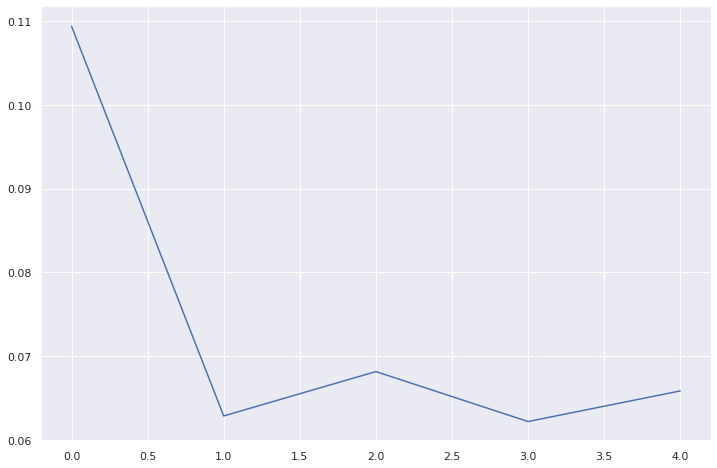

In [31]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch);

In [32]:
X_test = test_data.drop(y_col,axis=1).copy()
y_test = test_data[[y_col]].copy()
X_test = X_test.iloc[:, 1:5]

print(X_test.shape, y_test.shape)
#X_test = test_data[[y_col]].copy()

X_test 

(82, 4) (82, 1)


,cases,deaths,daily_cases,year
329,16773586,304041,202971,2020
330,17018628,307652,245042,2020
331,17257055,310950,238427,2020
332,17508278,313820,251223,2020
333,17702197,316381,193919,2020
...,...,...,...,...
406,28737407,515710,57789,2021
407,28804121,518079,66714,2021
408,28871536,520028,67415,2021
409,28937218,522511,65682,2021


In [33]:
y_test 
#print(y_test.shape)
#y_test

,daily_deaths
329,3025
330,3611
331,3298
332,2870
333,2561
...,...
406,1306
407,2369
408,1949
409,2483


In [36]:
scaled_X_test = Xscaler.transform(X_test)
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=n_input, batch_size=b_size)

print(test_generator[0][0].shape)



(32, 8, 4)


In [37]:
y_pred_scaled = model.predict(test_generator)
y_pred = Yscaler.inverse_transform(y_pred_scaled)
results = pd.DataFrame({'y_true':test_data[y_col].values[n_input:],'y_pred':y_pred.ravel()})
print(results)



    y_true       y_pred
0     3412  1345.857422
1     2824  1354.788818
2     1129  1356.560791
3     1646  1351.627441
4     1230  1356.939819
..     ...          ...
69    1306  2160.326660
70    2369  2164.818604
71    1949  2170.398682
72    2483  2175.229248
73    1459  2180.131836

[74 rows x 2 columns]


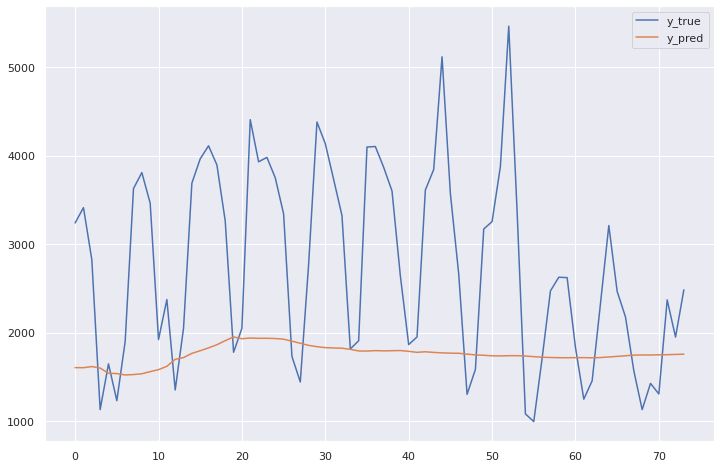

In [28]:
results.plot();

## Non Deep Learning algorithm - Random Forest


We fit our random forest model and predict the daily deaths on the testing set.

In [38]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


RandomForestRegressor(n_estimators=1000, random_state=42)

In [39]:
pred_daily_deaths = regressor.predict(X_test)

dataset = pd.DataFrame()
dataset['pred_daily_deaths'] = pred_daily_deaths.tolist()
dataset = dataset.reset_index()
#dataset = dataset.drop('index', axis=1)
#dataset = dataset.rename({'index':'level_0'}, axis=1)
dataset

,index,pred_daily_deaths
0,0,1776.394
1,1,2825.798
2,2,2822.868
3,3,2818.897
4,4,1795.591
...,...,...
77,77,767.735
78,78,865.076
79,79,886.494
80,80,855.673


In [40]:

y1_test = y_test.reset_index()

y1_test = y1_test.drop('index', axis=1)

#y1_test = y_test.rename({'level_0':'index'}, axis=1)
#y1_test.index = np.arange(0, len(y1_test) )
y1_test

,daily_deaths
0,3025
1,3611
2,3298
3,2870
4,2561
...,...
77,1306
78,2369
79,1949
80,2483


In [41]:
y2_test = y1_test.reset_index()
y2_test

,index,daily_deaths
0,0,3025
1,1,3611
2,2,3298
3,3,2870
4,4,2561
...,...,...
77,77,1306
78,78,2369
79,79,1949
80,80,2483


In [42]:
len(y2_test)

82

In [43]:
#df_total = pd.concat([X_test, y_test], axis=1)


#df_total = pd.concat([y_test, dataset], axis=1)
#df_total
df_merge = pd.merge(y2_test, dataset)
df_merge

,index,daily_deaths,pred_daily_deaths
0,0,3025,1776.394
1,1,3611,2825.798
2,2,3298,2822.868
3,3,2870,2818.897
4,4,2561,1795.591
...,...,...,...
77,77,1306,767.735
78,78,2369,865.076
79,79,1949,886.494
80,80,2483,855.673


In [423]:
#df_merge.plot(y=["daily_deaths", "pred_daily_deaths"], kind="line")

In [167]:
#df_1=pd.DataFrame({'Actual':y_test, 'Predicted':y1_pred})
#df_1 = pd.DataFrame({'Actual':test_data[y_col].values[n_input:],'Predicted':y1_pred})
#df_1

Plot the the true value vs the predicted value.

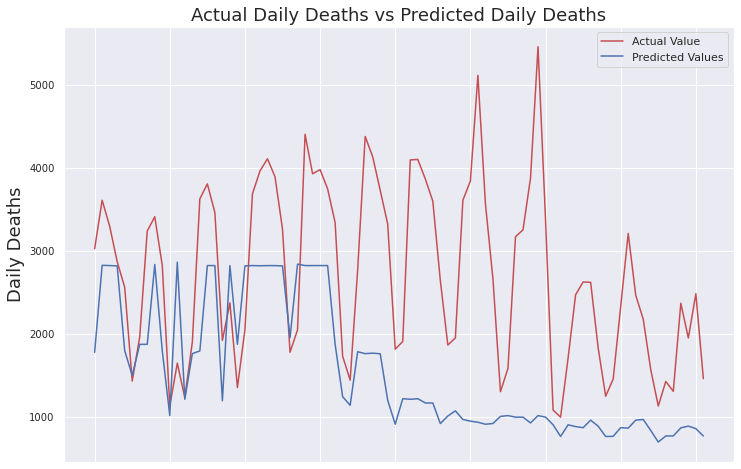

<Figure size 936x576 with 0 Axes>

In [44]:
import seaborn as sns



ax = sns.lineplot(x ='index', y='daily_deaths', data=df_merge, color="r", label="Actual Value")
sns.lineplot(x ='index', y='pred_daily_deaths', data=df_merge, color="b", label="Predicted Values" , ax=ax)



ax.set(xticklabels=[])

ax.set(xlabel=None)

plt.ylabel("Daily Deaths", fontsize = 18)
#plt.xlabel("Days", fontsize = 18)
plt.title('Actual Daily Deaths vs Predicted Daily Deaths', fontsize = 18)

#plt.xticks(size = 10, rotation=45)
plt.yticks(size = 10)
plt.figure(figsize=(13,8))
plt.show()


#plt.close()

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math

mse = mean_squared_error(y_test, pred_daily_deaths)
rmse = math.sqrt(mse)
print('Accuracy for Random Forest',100*max(0,rmse)) 

#accuracy = accuracy_score(y_test, pred_daily_deaths)

#mse = mean_squared_error(x_test, y_test)




Accuracy for Random Forest 157458.45298555162


In [52]:
print ('Random Forest accuracy for Training Data is:', regressor.score(X_train,y_train))


Random Forest accuracy for Training Data is: 0.9725717851289654
